In [1]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
import BruteForceOptimized as bfo
import AntColonyOptimized as aco
import vns as vns

import random
import copy
from matplotlib import pyplot as plt

importing Jupyter notebook from GraphGenerator.ipynb
importing Jupyter notebook from BruteForce.ipynb
importing Jupyter notebook from BruteForceOptimized.ipynb
importing Jupyter notebook from AntColonyOptimized.ipynb
importing Jupyter notebook from vns.ipynb


In [2]:
def plot(num_iterations, length_per_iteration):
    colors = ['xkcd:ruby', 'xkcd:gross green', 'xkcd:bright turquoise', 'xkcd:warm purple', 'xkcd:canary yellow']
    color = random.sample(colors, k=1)[0]
    plt.plot(range(1, num_iterations+1), length_per_iteration, color=color, label='Best Weight')

    indices = [i for i, value in enumerate(length_per_iteration) if value == -1]
    plt.scatter([i+1 for i in indices], [-1]*len(indices), marker='x', color='red', label='Solution not found')
    
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

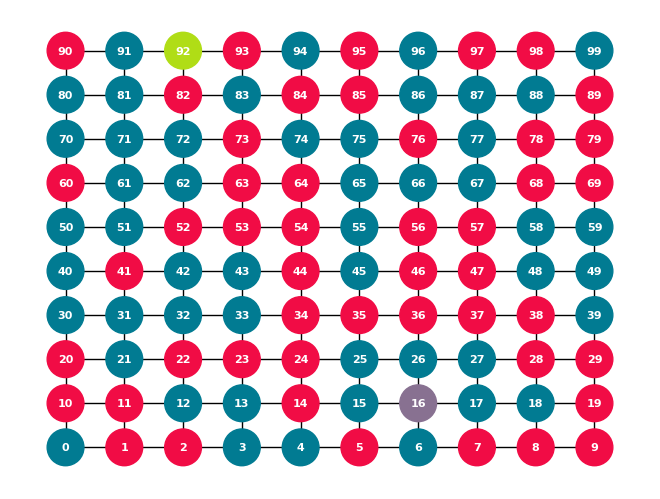

In [9]:
g, obstacles, start_pos, goal_pos = gg.build_grid(10)
obstacles_start = copy.deepcopy(obstacles)

In [10]:
num_iterations = 100
alpha = 0.9
beta = 1.5
theta = 100
num_ants = 50
rho = 0.9

# Brute Force:

In [11]:
length_per_iteration_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 204 was found in iteration 87
Time it took to finish the search: 5.074943
Best path of all iterations: 
('o', '7->6')
('r', '16->26')
('r', '26->16')
('o', '6->7')
('o', '20->21')
('o', '38->48')
('o', '54->43')
('o', '24->25')
('r', '16->17')
('r', '17->16')
('o', '46->45')
('o', '22->32')
('o', '34->24')
('o', '90->91')
('o', '32->42')
('o', '95->96')
('r', '16->6')
('o', '42->53')
('o', '54->55')
('o', '25->22')
('o', '44->43')
('o', '56->66')
('o', '21->12')
('o', '2->22')
('r', '6->16')
('o', '53->54')
('o', '69->77')
('r', '16->6')
('o', '79->78')
('o', '89->88')
('o', '41->40')
('o', '28->18')
('o', '54->65')
('o', '25->15')
('o', '2->3')
('o', '35->34')
('o', '60->50')
('o', '38->49')
('o', '96->86')
('o', '50->51')
('o', '9->28')
('o', '34->44')
('o', '45->64')
('o', '36->47')
('o', '10->20')
('o', '63->62')
('o', '24->4')
('o', '51->61')
('o', '62->63')
('o', '64->74')
('o', '47->46')
('r', '6->16')
('o', '61->71')
('r', '16->26')
('r', '26->27')
('o', '

# Optimized brute

In [12]:
obstacles = copy.deepcopy(obstacles_start)
length_per_iteration_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 28 was found in iteration 49
Time it took to finish the search: 0.339807
Best path of all iterations: [16, 15, 14, 13, 12, 22, 21, 31, 30, 40, 50, 51, 61, 71, 81, 82, 92]
52->42
14->4
38->39
68->58
22->32
39->38
19->18
2->3
76->66
82->72
60->70
10->0


# ACO

In [13]:
for edge in g.edges:
        g.edges[edge]['pheromones'] = round(random.uniform(1e-3, 1e-2), 4)
        g.edges[edge]['weight'] = 1
    
obstacles = copy.deepcopy(obstacles_start)
length_per_iteration_aco = aco.aco(g, start_pos, goal_pos, num_ants, rho, num_iterations, theta, alpha, beta, obstacles)

Best score: 20
Best solution: [16, 15, 5, 4, 3, 13, 12, 22, 21, 31, 30, 40, 50, 51, 61, 71, 81, 91, 92]
Obstacles moved: ['5->6', '22->32']
Time it took to finish the search: 0.29227


# VNS

In [14]:
obstacles = copy.deepcopy(obstacles_start)
vns_params = {
    'time_limit': 2,
    'k_min': 1,
    'k_max': 3,
    'move_prob': 0.1,
}
solution, value = vns.vns(g, start_pos, goal_pos, obstacles, vns_params, num_iters = 10000)
print()
result, result_value = vns.simulated_annealing(g, start_pos, goal_pos, obstacles, num_iters = 10000)

Najmanje pomeraja prepreka:  56
Najbolje prepreke:  [1, 4, 8, 9, 10, 11, 12, 13, 18, 21, 22, 24, 25, 28, 29, 31, 33, 34, 35, 37, 38, 39, 47, 48, 50, 53, 54, 55, 56, 57, 58, 63, 65, 69, 70, 71, 73, 75, 77, 87, 88, 89, 91, 93, 95, 96, 97, 99]
Najbolji rezultat:  68
Time it took to finish the search: 24.299369

Najmanje pomeraja prepreka:  0
Najbolje prepreke:  [1, 2, 5, 7, 8, 9, 10, 11, 14, 19, 20, 22, 23, 24, 28, 29, 34, 35, 36, 37, 38, 41, 44, 46, 47, 52, 53, 54, 56, 57, 60, 63, 64, 68, 69, 73, 76, 78, 79, 82, 84, 85, 89, 90, 93, 95, 97, 98]
Najbolji rezultat:  inf
Time it took to finish the search: 0.298917


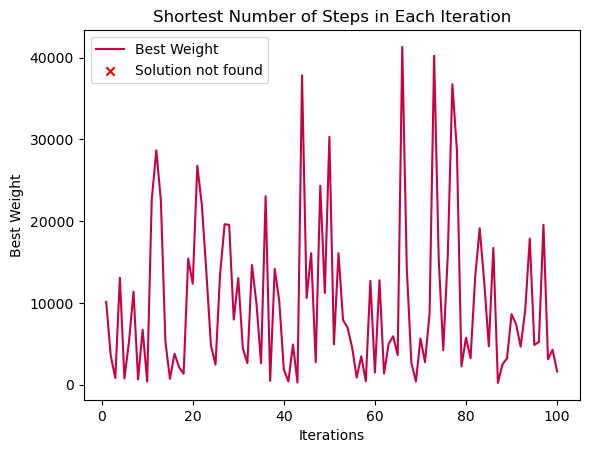

In [15]:
plot(num_iterations, length_per_iteration_bf)

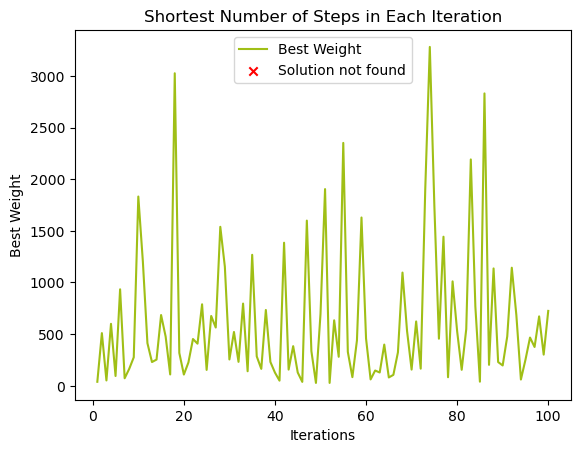

In [16]:
plot(num_iterations, length_per_iteration_bfo)

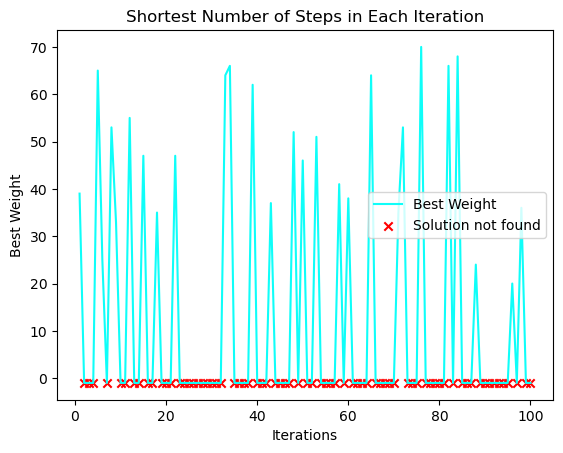

In [17]:
plot(num_iterations, length_per_iteration_aco)